In [1]:
import requests

url = "https://ind-nutrient-api1.p.rapidapi.com/food/core"

headers = {
	"X-RapidAPI-Key": "5414589f59msha714c78c65c9b45p11bc0bjsnb62963bebfac",
	"X-RapidAPI-Host": "ind-nutrient-api1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)



In [2]:
import json
op='/Users/matheen/Documents/Data Analysis/Indian_food_project/op.json'
op_data=response.json()
with open(op, 'w') as outfile:
    json.dump(op_data, outfile)

In [3]:
#print(response.json())
print(type(response))

<class 'requests.models.Response'>


In [4]:
import requests
import json


# Parse the JSON data from the response , as json.loads work with only string response we convert response to str with response.text
data = json.loads(response.text)

#print(data)

#{'core_count': 16, 'cores': [{'core_type': 'Aloo', 'related_food_length': 11, 'related_food': [{'_id': '646e44df0e77ec175b88cf32', 'food_name': 'Aloo Paratha', 'quantity': '1 paratha', 'calories': 330, 'uri': 'https://indnutrientsapi.tech/food/name/Aloo-Paratha', 'type': 'Vegetarian', 'type_uri': 'https://indnutrientsapi.tech/food?type=Vegetarian', 'core': 'Aloo', 'core_uri': 'https://indnutrientsapi.tech/food?core=Aloo', 'food_nutrition': [{'nutrient_name': 'carbohydrates', 'value': 47.72, 'unit': 'g'}, {'nutrient_name': 'fat', 'value': 13.45, 'unit': 'g'}, {'nutrient_name': 'protein', 'value': 5.94, 'unit': 'g'}]}, 

# Access the desired property
core_count = data['core_count']

# Print the value
print(data['cores'][0]['core_type'])
print('***')
print(data['cores'][0]['related_food'][0])
print('***')
print(data['cores'][0]['related_food'][0]['food_name'])
print('***')
print(data['cores'][0]['related_food'][0]['food_nutrition'])
print('***')

print(data['cores'][0]['related_food'][0]['food_nutrition'][1]['nutrient_name'])
print('***')
print("Iterate over Json")
print('***')

# To see data clearly
# for _cores in data['cores']:
#     print("Core Food:",_cores['core_type'],'\n')
#     for _related_food in _cores['related_food']:
#         print("\n")
#         print(" ","Food Name:",_related_food['food_name'])
#         print(" ","Quantity:",_related_food['quantity'])
#         print(" ","Calories:",_related_food['calories'])
#         print(" ","Type:",_related_food['type'])


#         for _nutrients in _related_food['food_nutrition']:
#             print(" ","Nutrient:",_nutrients['nutrient_name'],"\n"," ","Nutrient Value in gms",_nutrients['value'])

Aloo
***
{'_id': '646e44df0e77ec175b88cf32', 'food_name': 'Aloo Paratha', 'quantity': '1 paratha', 'calories': 330, 'uri': 'https://indnutrientsapi.tech/food/name/Aloo-Paratha', 'type': 'Vegetarian', 'type_uri': 'https://indnutrientsapi.tech/food?type=Vegetarian', 'core': 'Aloo', 'core_uri': 'https://indnutrientsapi.tech/food?core=Aloo', 'food_nutrition': [{'nutrient_name': 'carbohydrates', 'value': 47.72, 'unit': 'g'}, {'nutrient_name': 'fat', 'value': 13.45, 'unit': 'g'}, {'nutrient_name': 'protein', 'value': 5.94, 'unit': 'g'}]}
***
Aloo Paratha
***
[{'nutrient_name': 'carbohydrates', 'value': 47.72, 'unit': 'g'}, {'nutrient_name': 'fat', 'value': 13.45, 'unit': 'g'}, {'nutrient_name': 'protein', 'value': 5.94, 'unit': 'g'}]
***
fat
***
Iterate over Json
***


In [5]:
import pandas as pd
df=pd.read_json(response.text)
print(df)

    core_count                                              cores
0           16  {'core_type': 'Aloo', 'related_food_length': 1...
1           16  {'core_type': 'Chicken', 'related_food_length'...
2           16  {'core_type': 'Coffee', 'related_food_length':...
3           16  {'core_type': 'Dal', 'related_food_length': 17...
4           16  {'core_type': 'Dosa', 'related_food_length': 8...
5           16  {'core_type': 'Egg', 'related_food_length': 70...
6           16  {'core_type': 'Fish', 'related_food_length': 7...
7           16  {'core_type': 'Ice Cream', 'related_food_lengt...
8           16  {'core_type': 'Khichdi', 'related_food_length'...
9           16  {'core_type': 'Mutton', 'related_food_length':...
10          16  {'core_type': 'Naan', 'related_food_length': 7...
11          16  {'core_type': 'Paneer', 'related_food_length':...
12          16  {'core_type': 'Paratha', 'related_food_length'...
13          16  {'core_type': 'Roti', 'related_food_length': 1...
14        

In [6]:
df[['cores'][0]]

for _cores in df['cores']:
    print("Core Food:",_cores['core_type'],'\n')

Core Food: Aloo 

Core Food: Chicken 

Core Food: Coffee 

Core Food: Dal 

Core Food: Dosa 

Core Food: Egg 

Core Food: Fish 

Core Food: Ice Cream 

Core Food: Khichdi 

Core Food: Mutton 

Core Food: Naan 

Core Food: Paneer 

Core Food: Paratha 

Core Food: Roti 

Core Food: Sabzi 

Core Food: Tea 



In [7]:
df.isnull().sum()

core_count    0
cores         0
dtype: int64

In [8]:
# https://www.geeksforgeeks.org/python-pandas-flatten-nested-json/
import numpy as np
df = pd.json_normalize(
    data['cores'], 
    'related_food', 
    ['core_type', 'related_food_length'],
    errors='ignore'
)

df['core'] = df['core'].replace('', np.nan)

first_row = df.iloc[300]
print(first_row)
print(first_row['food_nutrition'])

for ele in first_row['food_nutrition']:
   if ele['nutrient_name']=='carbohydrates':
    print(ele['value'])

_id                                             646e47df86463310c1a2b3b5
food_name                                                 Ice Cream Cone
quantity                         1 cone and single dip (or 1 small cone)
calories                                                             170
uri                    https://indnutrientsapi.tech/food/name/Ice-Cre...
type                                                          Vegetarian
type_uri               https://indnutrientsapi.tech/food?type=Vegetarian
core                                                           Ice Cream
core_uri                https://indnutrientsapi.tech/food?core=Ice-Cream
food_nutrition         [{'nutrient_name': 'carbohydrates', 'value': 2...
core_type                                                      Ice Cream
related_food_length                                                   31
Name: 300, dtype: object
[{'nutrient_name': 'carbohydrates', 'value': 22.82, 'unit': 'g'}, {'nutrient_name': 'fat', 'value':

In [9]:
df.describe()

,calories
count,497.000000
mean,164.136821
std,124.183289
min,0.000000
25%,75.000000
50%,145.000000
75%,242.000000
max,715.000000


In [10]:
#df[df['core']=='Ice Cream'].sort_values('calories')

In [11]:
print(df.iloc[0])

_id                                             646e44df0e77ec175b88cf32
food_name                                                   Aloo Paratha
quantity                                                       1 paratha
calories                                                             330
uri                    https://indnutrientsapi.tech/food/name/Aloo-Pa...
type                                                          Vegetarian
type_uri               https://indnutrientsapi.tech/food?type=Vegetarian
core                                                                Aloo
core_uri                     https://indnutrientsapi.tech/food?core=Aloo
food_nutrition         [{'nutrient_name': 'carbohydrates', 'value': 4...
core_type                                                           Aloo
related_food_length                                                   11
Name: 0, dtype: object


In [12]:
#to see index
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=497, step=1)
Index(['_id', 'food_name', 'quantity', 'calories', 'uri', 'type', 'type_uri',
       'core', 'core_uri', 'food_nutrition', 'core_type',
       'related_food_length'],
      dtype='object')


In [13]:
df.loc[0]

_id                                             646e44df0e77ec175b88cf32
food_name                                                   Aloo Paratha
quantity                                                       1 paratha
calories                                                             330
uri                    https://indnutrientsapi.tech/food/name/Aloo-Pa...
type                                                          Vegetarian
type_uri               https://indnutrientsapi.tech/food?type=Vegetarian
core                                                                Aloo
core_uri                     https://indnutrientsapi.tech/food?core=Aloo
food_nutrition         [{'nutrient_name': 'carbohydrates', 'value': 4...
core_type                                                           Aloo
related_food_length                                                   11
Name: 0, dtype: object

In [14]:
#no of vegetarian dishes and non veg dishes

df['type'].value_counts()

Vegetarian        266
Non Vegetarian    231
Name: type, dtype: int64

In [15]:
# Is Non vegetarian dishes are protien rich than vegetarian?

food_type=df.groupby('type')
food_type.mean()



/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_23650/3690413215.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food_type.mean()


,calories
type,
Non Vegetarian,195.493506
Vegetarian,136.906015


In [16]:
# Is Non vegetarian dishes are protien rich than vegetarian?

avg_veg_protein=0
avg_non_veg_protein=0

veg_nutrition=df[df['type']=='Vegetarian']['food_nutrition']
non_veg_nutrition=df[df['type']=='Non Vegetarian']['food_nutrition']

for index,rows in df.iterrows():
    if rows['type']=='Vegetarian':

        avg_veg_protein+=[nutr['value'] for nutr in rows['food_nutrition'] if nutr['nutrient_name']=='protein'][0]
    elif rows['type']=='Non Vegetarian':
        avg_non_veg_protein+=[nutr['value'] for nutr in rows['food_nutrition'] if nutr['nutrient_name']=='protein'][0]

print("Average Protien Content in Vegetarian foods:",round(avg_veg_protein/len(veg_nutrition),2))
print("Average Protien Content in Non Vegetarian foods:",round(avg_non_veg_protein/len(non_veg_nutrition),2))


Average Protien Content in Vegetarian foods: 4.15
Average Protien Content in Non Vegetarian foods: 19.68


In [17]:
#Calories in vegetarian food vs non vegetarion food

print("Average calories in Vegetarian food:",round(df[df['type']=='Vegetarian']['calories'].mean(),2))
print("Average calories in Vegetarian food:",round(df[df['type']=='Non Vegetarian']['calories'].mean(),2))


Average calories in Vegetarian food: 136.91
Average calories in Vegetarian food: 195.49


In [18]:
#Top 5 foods high calorie foods

df.sort_values('calories',ascending=False).head(5)[['food_name','calories']].reset_index(drop=True)

,food_name,calories
0,"Chicken Meat And Skin (roasted, Cooked)",715
1,Egg Salad,706
2,"Egg, Cheese And Steak On Bagel",661
3,"Egg, Cheese And Ham On Bagel",597
4,"Chum Salmon (drained Solids With Bone, Without...",520


In [19]:
df.iloc[0]

_id                                             646e44df0e77ec175b88cf32
food_name                                                   Aloo Paratha
quantity                                                       1 paratha
calories                                                             330
uri                    https://indnutrientsapi.tech/food/name/Aloo-Pa...
type                                                          Vegetarian
type_uri               https://indnutrientsapi.tech/food?type=Vegetarian
core                                                                Aloo
core_uri                     https://indnutrientsapi.tech/food?core=Aloo
food_nutrition         [{'nutrient_name': 'carbohydrates', 'value': 4...
core_type                                                           Aloo
related_food_length                                                   11
Name: 0, dtype: object

In [20]:
# no null vales in food_nutrition
print(df[df['food_nutrition'].isna()])

#create new columns 

protein=[]
carbohydrates=[]
fat=[]
for ele in df['food_nutrition']:
    for nutri in ele:
        if nutri['nutrient_name']=='carbohydrates':
            carbohydrates.append(nutri['value'])
        if nutri['nutrient_name']=='fat':
            fat.append(nutri['value'])
        if nutri['nutrient_name']=='protein':
            protein.append(nutri['value'])
        


df['protein']=protein
df['carbohydrates']=carbohydrates
df['fat']=fat





Empty DataFrame
Columns: [_id, food_name, quantity, calories, uri, type, type_uri, core, core_uri, food_nutrition, core_type, related_food_length]
Index: []


In [21]:
df.iloc[0]

_id                                             646e44df0e77ec175b88cf32
food_name                                                   Aloo Paratha
quantity                                                       1 paratha
calories                                                             330
uri                    https://indnutrientsapi.tech/food/name/Aloo-Pa...
type                                                          Vegetarian
type_uri               https://indnutrientsapi.tech/food?type=Vegetarian
core                                                                Aloo
core_uri                     https://indnutrientsapi.tech/food?core=Aloo
food_nutrition         [{'nutrient_name': 'carbohydrates', 'value': 4...
core_type                                                           Aloo
related_food_length                                                   11
protein                                                             5.94
carbohydrates                                      

In [22]:
#Top 5 foods protein rich foods


df.sort_values('protein',ascending=False)[['food_name','protein']].head(5).reset_index(drop=True)

,food_name,protein
0,"Chicken Meat And Skin (roasted, Cooked)",81.63
1,Egg White (dried),81.10
2,"Chum Salmon (drained Solids With Bone, Without...",79.08
3,"Egg Whole (dried, Flakes, Glucose Reduced)",76.92
4,Chicken Marsala,56.40


In [23]:
import matplotlib.pyplot as plt



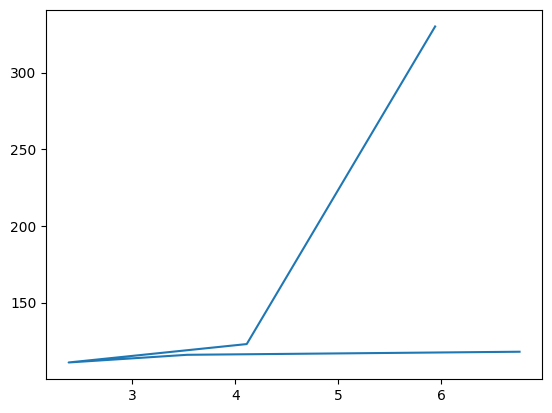

In [24]:
plt.plot(df['protein'].head(),df['calories'].head())

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_23650/1704162245.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<AxesSubplot: >

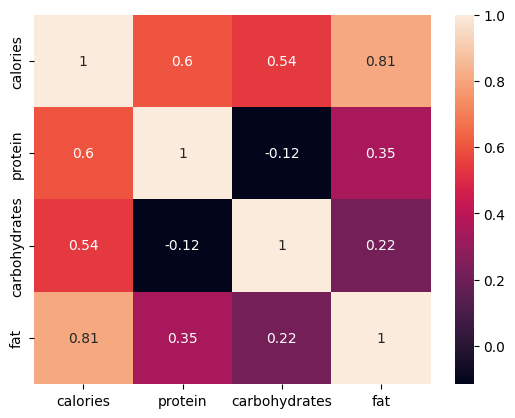

In [25]:
correlation_matrix = df.corr()
correlation_matrix
import seaborn as sns

sns.heatmap(correlation_matrix,annot=True)

# protein and Carbohydrates are negatively corelated
#Fat and calories are highly corelated

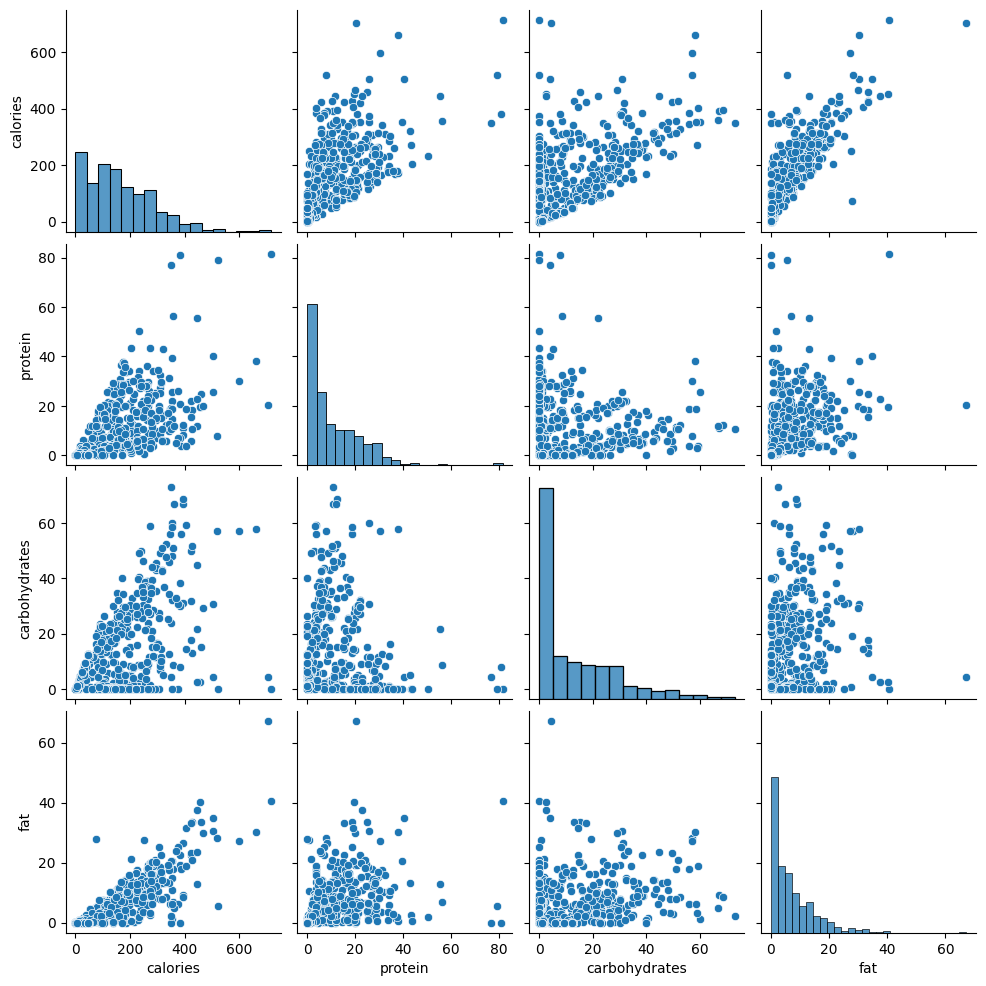

In [26]:
sns.pairplot(df.drop('related_food_length',axis=1))

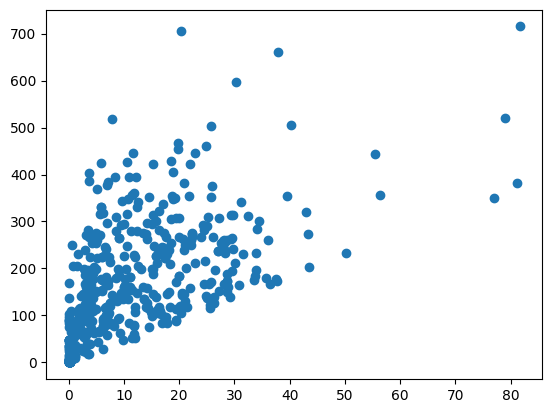

In [27]:
plt.scatter(df['protein'],df['calories'])

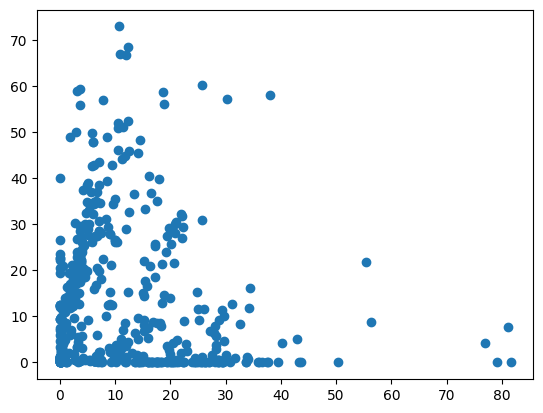

In [28]:
plt.scatter(df['protein'],df['carbohydrates'])

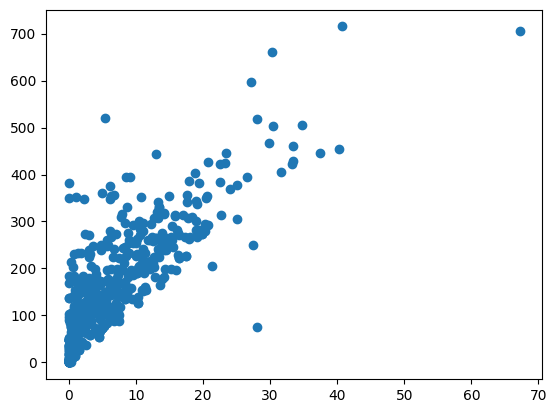

In [29]:
plt.scatter(df['fat'],df['calories'])

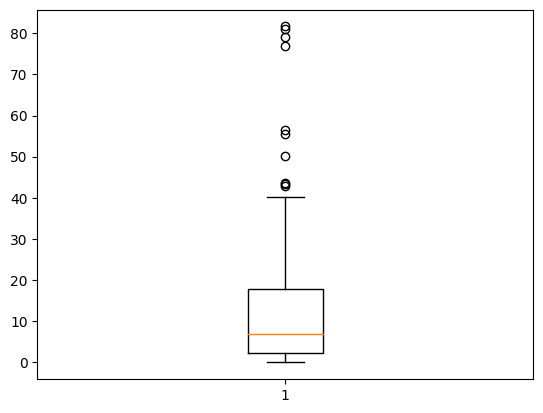

In [30]:

# Create a box plot for a specific column
plt.boxplot(df['protein'])
plt.show()


In [31]:
df['type'].value_counts().index[0]

'Vegetarian'

In [32]:
df.columns

Index(['_id', 'food_name', 'quantity', 'calories', 'uri', 'type', 'type_uri',
       'core', 'core_uri', 'food_nutrition', 'core_type',
       'related_food_length', 'protein', 'carbohydrates', 'fat'],
      dtype='object')

In [33]:
df['core'].value_counts()

Egg          70
Fish         70
Coffee       65
Tea          65
Chicken      53
Mutton       38
Ice Cream    31
Dal          17
Sabzi        17
Paratha      16
Roti         14
Paneer       13
Aloo         11
Dosa          8
Naan          7
Khichdi       2
Name: core, dtype: int64

In [34]:
df.groupby('core').mean()['calories']

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_23650/3375719680.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('core').mean()['calories']


core
Aloo         140.909091
Chicken      206.641509
Coffee        84.846154
Dal          211.470588
Dosa         126.500000
Egg          197.485714
Fish         168.957143
Ice Cream    214.645161
Khichdi      187.000000
Mutton       225.157895
Naan         204.571429
Paneer       267.307692
Paratha      252.062500
Roti         187.214286
Sabzi        188.529412
Tea           45.400000
Name: calories, dtype: float64

In [35]:
df.groupby('core').mean().sort_values('calories',ascending=False)

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_23650/547892396.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('core').mean().sort_values('calories',ascending=False)


,calories,protein,carbohydrates,fat
core,,,,
Paneer,267.307692,12.116923,20.001538,16.263077
Paratha,252.062500,6.348125,35.280625,9.403125
Mutton,225.157895,19.074474,11.215263,11.197368
Ice Cream,214.645161,4.061935,27.212903,10.634516
Dal,211.470588,11.181765,31.735294,4.997059
Chicken,206.641509,22.496792,4.959623,9.842264
Naan,204.571429,9.030000,25.154286,7.355714
Egg,197.485714,13.969857,7.502429,11.703571
Sabzi,188.529412,6.513529,26.510000,7.378235


In [36]:
df.groupby('core').mean().sort_values('protein',ascending=False)

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_23650/3997774868.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('core').mean().sort_values('protein',ascending=False)


,calories,protein,carbohydrates,fat
core,,,,
Fish,168.957143,23.600714,2.390429,5.331857
Chicken,206.641509,22.496792,4.959623,9.842264
Mutton,225.157895,19.074474,11.215263,11.197368
Egg,197.485714,13.969857,7.502429,11.703571
Paneer,267.307692,12.116923,20.001538,16.263077
Dal,211.470588,11.181765,31.735294,4.997059
Naan,204.571429,9.030000,25.154286,7.355714
Sabzi,188.529412,6.513529,26.510000,7.378235
Paratha,252.062500,6.348125,35.280625,9.403125


In [37]:
df.groupby('core').mean().sort_values(by=['protein','carbohydrates','fat'],ascending=[False,True,True])

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_23650/3367695770.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('core').mean().sort_values(by=['protein','carbohydrates','fat'],ascending=[False,True,True])


,calories,protein,carbohydrates,fat
core,,,,
Fish,168.957143,23.600714,2.390429,5.331857
Chicken,206.641509,22.496792,4.959623,9.842264
Mutton,225.157895,19.074474,11.215263,11.197368
Egg,197.485714,13.969857,7.502429,11.703571
Paneer,267.307692,12.116923,20.001538,16.263077
Dal,211.470588,11.181765,31.735294,4.997059
Naan,204.571429,9.030000,25.154286,7.355714
Sabzi,188.529412,6.513529,26.510000,7.378235
Paratha,252.062500,6.348125,35.280625,9.403125


In [38]:
low_calorie=df[df['calories']<100]
print(len(low_calorie))

medium_calorie=df[(df['calories']>100) & (df['calories']<350)]
print(len(medium_calorie))

high_calorie=df[df['calories']>350]
print(len(high_calorie))

distribution_of_calories=[len(low_calorie),len(medium_calorie),len(high_calorie)]



169
286
40


Text(0.5, 1.0, 'Ditribution of food items based on calories')

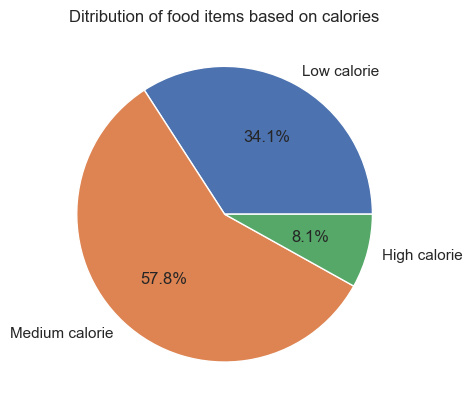

In [39]:
sns.set(style='whitegrid')
plt.pie(distribution_of_calories,labels=['Low calorie','Medium calorie','High calorie'],autopct='%1.1f%%')
plt.title("Ditribution of food items based on calories")

Text(0.5, 1.0, 'Ditribution of Vegetarian food items based on calories')

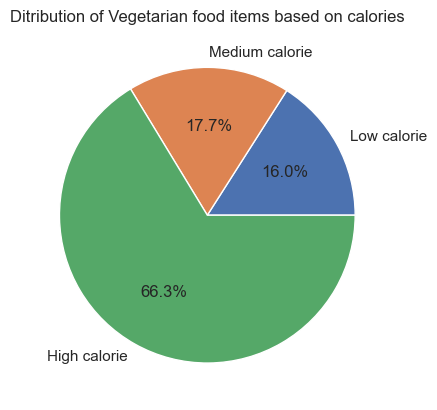

In [40]:
low_calorie=df[(df['calories']<100) & (df['type']=='Vegetarian')]

medium_calorie=df[(df['calories']>100) & (df['calories']<350) & (df['type']=='Vegetarian')]

high_calorie=df[df['calories']>350 & (df['type']=='Vegetarian')]

distribution_of_calories_veg=[len(low_calorie),len(medium_calorie),len(high_calorie)]
sns.set(style='whitegrid')
plt.pie(distribution_of_calories_veg,labels=['Low calorie','Medium calorie','High calorie'],autopct='%1.1f%%')
plt.title("Ditribution of Vegetarian food items based on calories")

Text(0.5, 1.0, 'Ditribution of Vegetarian food items based on calories')

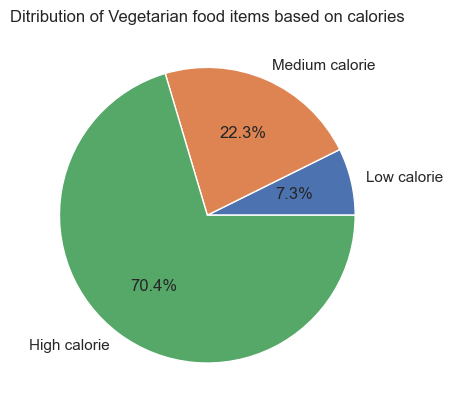

In [41]:
low_calorie=df[(df['calories']<100) & (df['type']=='Non Vegetarian')]

medium_calorie=df[(df['calories']>100) & (df['calories']<350) & (df['type']=='Non Vegetarian')]

high_calorie=df[df['calories']>350 & (df['type']=='Non Vegetarian')]

distribution_of_calories_non_veg=[len(low_calorie),len(medium_calorie),len(high_calorie)]
sns.set(style='whitegrid')
plt.pie(distribution_of_calories_non_veg,labels=['Low calorie','Medium calorie','High calorie'],autopct='%1.1f%%')
plt.title("Ditribution of Vegetarian food items based on calories")

In [42]:
df['calories'].max()

715

In [43]:
df['calories'].min()

0

Text(0.5, 1.0, 'Distribution of Calories by Type')

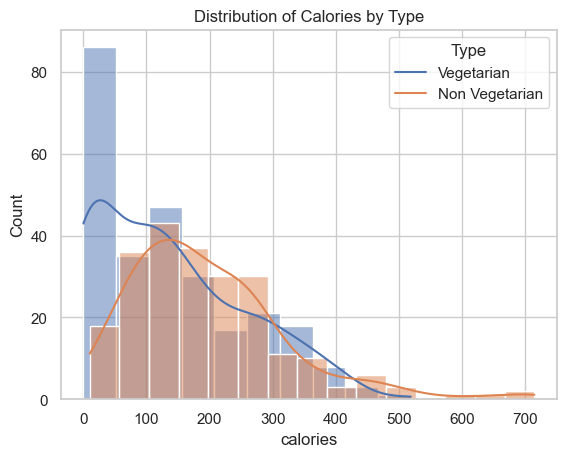

In [44]:
#Distribution of calories in veg vs non veg food

sns.histplot(df[df['type']=='Vegetarian']['calories'],kde=True)
sns.histplot(df[df['type']=='Non Vegetarian']['calories'],kde=True)
plt.legend(title='Type', labels=['Vegetarian', 'Non Vegetarian'])
plt.title('Distribution of Calories by Type')

#we see there are many vegetarian foods below 100 calories let us examine core food item in them

In [45]:
df[(df['type']=='Vegetarian') & (df['calories']<100)]['core'].value_counts()
#it makes sense most of it are tea and coffee

Tea          58
Coffee       46
Roti          3
Sabzi         3
Aloo          2
Dal           2
Paneer        2
Dosa          1
Ice Cream     1
Name: core, dtype: int64

In [46]:
#low calorie cone icecream

df[(df['core']=='Ice Cream') & (df['quantity'].str.contains('cone'))].sort_values('calories',ascending=True)[['food_name','calories','quantity']].reset_index(drop=True)

,food_name,calories,quantity
0,Ice Cream Cones (cake Or Wafer Type),17,1 cone
1,Light Ice Cream Cone (flavors Other Than Choco...,115,1 cone and single dip (or 1 small cone)
2,Light Ice Cream Cone,122,1 cone and single dip (or 1 small cone)
3,Ice Cream Cone (flavors Other Than Chocolate),166,1 cone and single dip (or 1 small cone)
4,Ice Cream Cone,170,1 cone and single dip (or 1 small cone)
5,Chocolate Covered Or Dipped Ice Cream Cone (fl...,187,1 cone and single dip
6,Chocolate Covered Or Dipped Chocolate Ice Crea...,190,1 cone
7,Ice Cream Cone With Nuts (flavors Other Than C...,204,1 cone


In [47]:
df['core'].value_counts()

Egg          70
Fish         70
Coffee       65
Tea          65
Chicken      53
Mutton       38
Ice Cream    31
Dal          17
Sabzi        17
Paratha      16
Roti         14
Paneer       13
Aloo         11
Dosa          8
Naan          7
Khichdi       2
Name: core, dtype: int64

In [48]:
df[(df['core']=='Tea') & df['food_name'].str.contains('Herbal')]['food_name'].reset_index(drop=True)

0                                           Herbal Tea
1            Herbal Tea (other Than Chamomile, Brewed)
2    Herbal Tea Presweetened With Low Calorie Sweet...
3                              Herbal Tea Presweetened
4                   Herbal Tea Presweetened With Sugar
Name: food_name, dtype: object

In [49]:
#bored of chicken, 50gms of protein other than chicken

df[(df['protein']>50) &(df['core'] !='Chicken')][['core','quantity','food_name','protein']].sort_values('protein',ascending=False).reset_index(drop=True)


,core,quantity,food_name,protein
0,Egg,100 g,Egg White (dried),81.10
1,Fish,1 can,"Chum Salmon (drained Solids With Bone, Without...",79.08
2,Egg,100 g,"Egg Whole (dried, Flakes, Glucose Reduced)",76.92
3,Egg,100 g,Egg Substitute (powder),55.50
4,Fish,1 piece (13.5 cm x 4 cm x 1.5 cm),Dried And Salted Atlantic Cod,50.26


In [50]:
hi=input("hello type ur name")
print(hi)

j


In [51]:
#wants to feel full

df['quantity']

0              1 paratha
1      1 serving (125 g)
2      1 serving (125 g)
3      1 serving (125 g)
4       1 serving (86 g)
             ...        
492       1 cup (250 ml)
493    1 bottle (500 ml)
494    1 teacup (180 ml)
495                1 tsp
496           1 tsp, dry
Name: quantity, Length: 497, dtype: object

<AxesSubplot: >

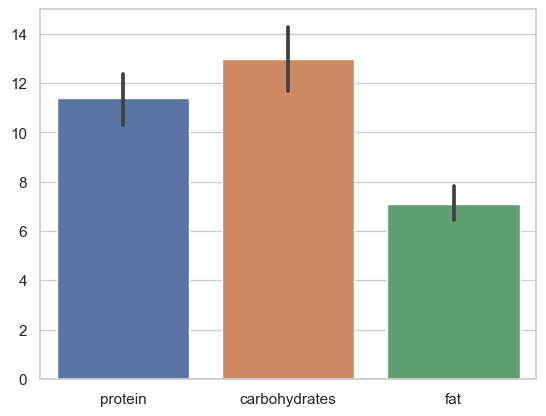

In [52]:
#Distribution of 'protein','carbohydrates','fat' in veg and non veg
sns.barplot(df[['protein','carbohydrates','fat']])



<AxesSubplot: >

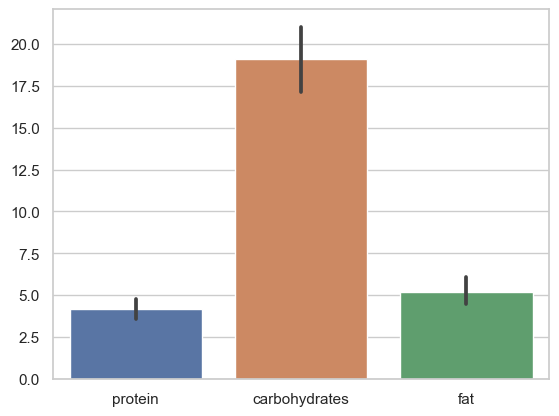

In [53]:
sns.barplot(df[df['type']=='Vegetarian'][['protein','carbohydrates','fat']])

<AxesSubplot: >

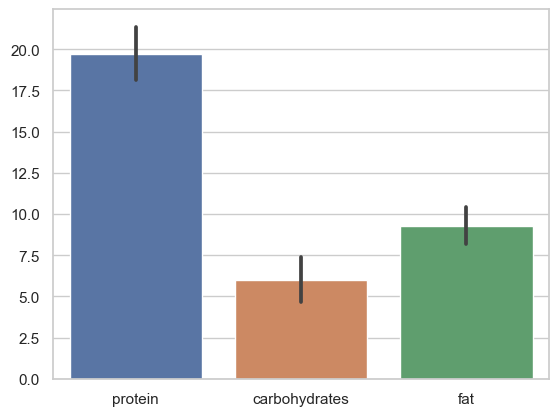

In [54]:
sns.barplot(df[df['type']=='Non Vegetarian'][['protein','carbohydrates','fat']])

Text(0.5, 1.0, 'Distrubtion of Nutrients in Non Vegetarian food')

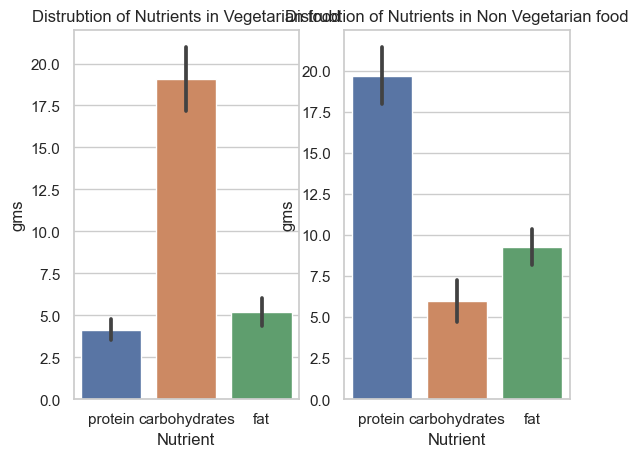

In [55]:

plt.subplot(1,2,1)
sns.barplot(df[df['type']=='Vegetarian'][['protein','carbohydrates','fat']])
plt.xlabel('Nutrient')
plt.ylabel('gms')
plt.title('Distrubtion of Nutrients in Vegetarian food')
plt.subplot(1,2,2)
sns.barplot(df[df['type']=='Non Vegetarian'][['protein','carbohydrates','fat']])
plt.xlabel('Nutrient')
plt.ylabel('gms')
plt.title('Distrubtion of Nutrients in Non Vegetarian food')

Text(0.5, 1.0, 'Distrubution of Nutrients in Non Vegetarian foods')

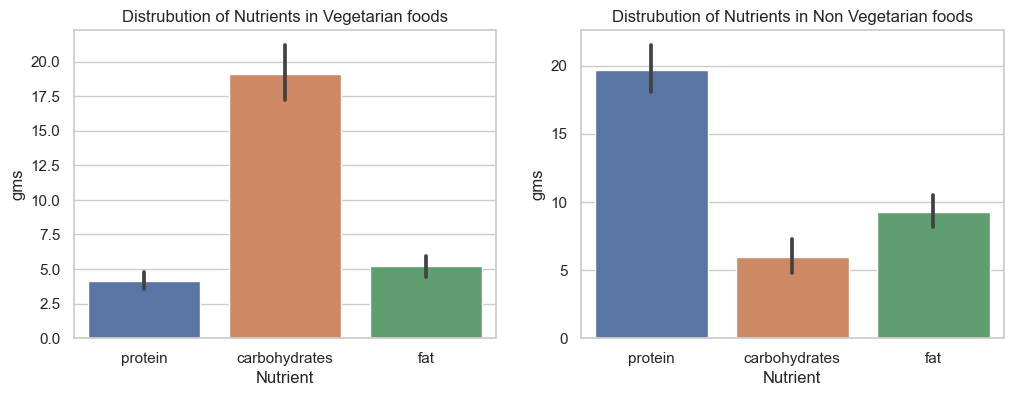

In [56]:
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(df[df['type']=='Vegetarian'][['protein','carbohydrates','fat']])
plt.xlabel('Nutrient')
plt.ylabel('gms')
plt.title('Distrubution of Nutrients in Vegetarian foods')
plt.subplot(1,2,2)
sns.barplot(df[df['type']=='Non Vegetarian'][['protein','carbohydrates','fat']])
plt.xlabel('Nutrient')
plt.ylabel('gms')
plt.title('Distrubution of Nutrients in Non Vegetarian foods')

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


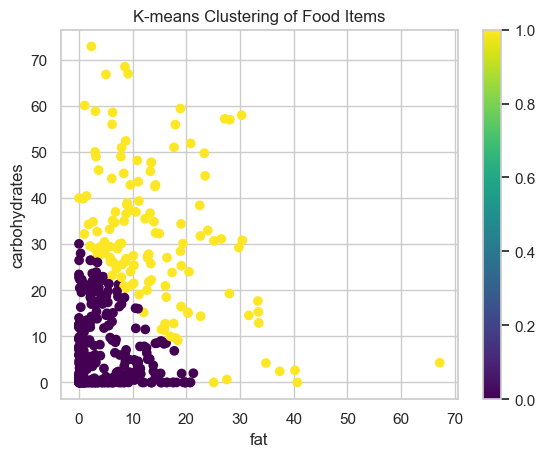

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select the relevant columns for clustering
features = [ 'carbohydrates', 'fat']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

plt.scatter(X['fat'], X['carbohydrates'], c=cluster_labels, cmap='viridis')
plt.colorbar()  
plt.xlabel('fat')
plt.ylabel('carbohydrates')
plt.title('K-means Clustering of Food Items')
plt.show()


In [1]:
class InvalidtypeException(Exception):
    "Raised when invalid type input"
    pass
class InvalidcoreException(Exception):
    "Raised when invalid core input"
    pass

class indian_food_recommendation:

    def __init__(self) -> None:
        self.start()
        

    def food_recommendation(self,type,specifications,core=[]):
        #print(type,specifications,core)
        if type=="No Specification":
            food=df
        else:
            food=df[df['type']==type]

        if core==['Surprise']:
            random_food=food.sample(n=2)
            #print(random_food)
            print(random_food[['food_name','quantity','calories','protein','carbohydrates','fat']].reset_index(drop=True))
            repeat=input("Happy :) ? \n 1 for getting new recommendations with same specifications  \n 2 for I'm good, exit!")
            if repeat=='1':
                self.food_recommendation(type,specifications,core)
            else:
                return

        else:
            #not surprise
            core_list=[]
            #print(core)
            for item in core:
                core_food=food[food['core']==item]
                core_list.append(core_food)
            #print(core_list)
            for item in core_list:
                if (specifications=='1'):
                    #print("protein")
                    avg=item['protein'].mean()
                    #print(avg)
                    item=item[item['protein']>avg]
                    random_food=item.sample(n=1)
                    print(random_food[['food_name','quantity','calories','protein','carbohydrates','fat']].reset_index(drop=True))
                    
                elif specifications=='2':
                    avg_carb=item['carbohydrates'].mean()
                    avg_fat=item['fat'].mean()
                    item=item[(item['carbohydrates']<avg_carb) &(item['fat']<avg_fat)]
                    random_food=item.sample(n=1)
                    print(random_food[['food_name','quantity','calories','protein','carbohydrates','fat']].reset_index(drop=True))
                
                
                else:
                    random_food=item.sample(n=1)
                    print(random_food[['food_name','quantity','calories','protein','carbohydrates','fat']].reset_index(drop=True))
                    
                
            repeat=input("Happy :) ? \n 1 for getting new recommendations with same specifications \n 2 for I'm good, exit!")
            if repeat=='1':
                self.food_recommendation(type,specifications,core)


            
            

                
                #food=food[food['core'].isin(core)]
        
    def start(self):
        print("***Welcome to Indian Food Recommendation System***")

        type=input ("Choose your preferred food type: \n 1 For Vegetarian \n  2 For  Non Vegetarian \n 3 For no specification/Mix ")

        try:
        
            valid_inputs=['1','2','3']
            if type not in valid_inputs:
                raise InvalidtypeException()
            else:
                specifications=input ("Choose your specifications: \n 1 For Protein Rich Food \n  2 For Less Carbohydrates & Fat Food \n 3 For no specifications ")
                if specifications not in valid_inputs:
                    raise InvalidtypeException()
                else:

                    if type=='1':
                        veg_core=input("Choose your Food Core Types with spaces in between:  \nAloo\nDal\nDosa\nKhichdi\nNaan\nPaneer\nParatha\nRoti\nSabzi\nIce Cream\nTea\nCoffee\nSurprise")
                        veg_core=veg_core.split()
                        valid_veg_core=['Aloo', 'Coffee', 'Dal', 'Dosa',
                                        'Ice Cream', 'Khichdi', 'Naan', 'Paneer', 'Paratha',
                                        'Roti', 'Sabzi', 'Tea','Surprise']
                        for i in range(len(veg_core)):
                            veg_core[i]=veg_core[i].capitalize()
                            if veg_core[i]=='Ice':
                                veg_core[i]='Ice Cream'
                            if veg_core[i]=='Cream':
                                print("continue")
                                del veg_core[i]
                                continue

                            if veg_core[i] not in valid_veg_core:
                                raise InvalidcoreException()
                            if veg_core[i]=='Surprise':
                                self.food_recommendation("Vegetarian",specifications,['Surprise'])
                        self.food_recommendation("Vegetarian",specifications,veg_core)
                    elif type=='2':
                        non_veg_core=input("Choose your Food Core Types with spaces in between:\n  Chicken\nFish\nMutton\nEgg\nIce Cream\nTea\nCoffee\nSurprise")
                        non_veg_core=non_veg_core.split()
                        valid_non_veg_core=[ 'Chicken', 'Coffee', 'Egg', 'Fish',
                                            'Ice Cream', 'Mutton','Tea','Surprise']
                        for i in range(len(non_veg_core)):
                            non_veg_core[i]=non_veg_core[i].capitalize()
                            if non_veg_core[i]=='Ice':
                                non_veg_core[i]='Ice Cream'
                            if non_veg_core[i]=='Cream':
                                print("continue")
                                del non_veg_core[i]
                                continue
                            if non_veg_core[i] not in non_veg_core:
                                raise InvalidcoreException()
                            if non_veg_core[i]=='Surprise':
                                self.food_recommendation("Non Vegetarian",specifications,['Surprise'])

                        self.food_recommendation("Non Vegetarian",specifications,non_veg_core)

                    else:
                            core=input("Choose your Food Core Types with spaces in between:  \nAloo\nDal\nDosa\nKhichdi\nNaan\nPaneer\nParatha\nRoti\nSabzi\nChicken\nFish\nnMutton\nEgg\nIce Cream\nTea\nCoffee\nSurprise")
                            core=core.split()

                            valid_core=['Aloo', 'Chicken', 'Coffee', 'Dal', 'Dosa', 'Egg', 'Fish',
                                        'Ice Cream', 'Khichdi', 'Mutton', 'Naan', 'Paneer', 'Paratha',
                                        'Roti', 'Sabzi', 'Tea','Surprise']

                            for i in range(len(core)):
                                core[i]=core[i].capitalize()
                                if core[i]=='Ice':
                                    core[i]='Ice Cream'
                                if core[i]=='Cream':
                                    print("continue")
                                    del core[i]
                                    continue
                                if core[i] not in valid_core:
                                    raise InvalidcoreException
                                if core[i]=='Surprise':
                                    self.food_recommendation("No Specification",specifications,['Surprise'])
                            self.food_recommendation("No Specification",specifications,core)
                            #print(core)
                    


        except InvalidtypeException():
            print("Invalid Input: Choose Values from 1 , 2 and 3!")
        except InvalidcoreException():
            print("Invalid Input: Choose from the valid core types")



indian_food_recommendation()


***Welcome to Indian Food Recommendation System***


TypeError: catching classes that do not inherit from BaseException is not allowed

In [59]:
from flask import Flask, render_template, request
import IndianFoodRecommendation, InvalidTypeException, InvalidCoreException

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/recommend', methods=['POST'])
def recommend():
    type = request.form['type']
    specifications = request.form['specifications']
    core = request.form.getlist('core')

    recommendation_system = IndianFoodRecommendation()

    try:
        recommendations = recommendation_system.food_recommendation(type, specifications, core)
        return render_template('recommendations.html', recommendations=recommendations)
    except (InvalidTypeException, InvalidCoreException) as e:
        error_message = str(e)
        return render_template('error.html', error_message=error_message)

if __name__ == '__main__':
    app.run(port=5001, debug=True)


ImportError: cannot import name 'Flask' from partially initialized module 'flask' (most likely due to a circular import) (/Users/matheen/Documents/Data Analysis/Indian_food_project/flask.py)

In [ ]:
df[df['core']=='Naan']

In [ ]:
df['protein'].mean()

In [ ]:
df['core'].unique()

In [ ]:
df[df['core']=="Coffee"]